#  Data load and imports

Import of libraries and packages

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn import preprocessing
import seaborn as sns

Get data

In [2]:
data = pd.read_csv('data/Data_Scientist_-_Case_Dataset.csv', delimiter=',')

In [3]:
data.columns

Index(['customer_id', 'converted', 'customer_segment', 'gender', 'age',
       'related_customers', 'family_size', 'initial_fee_level',
       'credit_account_id', 'branch'],
      dtype='object')

From the description of the data we know that the four variables: age, related customers, family size and initial fee level are numeric values. The remaining six variables (including the target variable, converted) are categorical values.

The customer id is unique for each customer which can be checked by checking that the length of the entire data set is the same as the unique number of customer ids:

In [4]:
len(data) == len(np.unique(data['customer_id']))

True

In [5]:
data

,customer_id,converted,customer_segment,gender,age,related_customers,family_size,initial_fee_level,credit_account_id,branch
0,15001,0,13,male,22.0,1,0,14.5000,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,Helsinki
1,15002,1,11,female,38.0,1,0,142.5666,afa2dc179e46e8456ffff9016f91396e9c6adf1fe20d17...,Tampere
2,15003,1,13,female,26.0,0,0,15.8500,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,Helsinki
3,15004,1,11,female,35.0,1,0,106.2000,abefcf257b5d2ff2816a68ec7c84ec8c11e0e0dc4f3425...,Helsinki
4,15005,0,13,male,35.0,0,0,16.1000,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,Helsinki
...,...,...,...,...,...,...,...,...,...,...
886,15887,0,12,male,27.0,0,0,26.0000,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,Helsinki
887,15888,1,11,female,19.0,0,0,60.0000,72294ba1616ddcaee48e56501040e876d26bd0c1839f3c...,Helsinki
888,15889,0,13,female,NaN,1,2,46.9000,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,Helsinki
889,15890,1,11,male,26.0,0,0,60.0000,a2b612f45840d6f27b1a73ddae7f50e0bd9c4935903de6...,Tampere


To check for missing data, I will print the number of missing data points for each column that has any data missing:

In [6]:
for n in data.columns:
    data_nan = len(data[pd.isna(data[n]) == True])
    if data_nan > 0:
        print(f'Number missing data in {n} is {data_nan}, resulting in {len(data) - data_nan} useable data points for that variable.')

Number missing data in age is 177, resulting in 714 useable data points for that variable.
Number missing data in branch is 2, resulting in 889 useable data points for that variable.


# Visualizing the key influencer from PowerBI analysis

The automatic "key influencers"-function in PowerBI (posted in the pdf-file "PowerBI_analysis.pdf") identified the gender to be the most important factor when predicting whether a customer has converted or not. Therefore I will start by looking at the data for each gender.

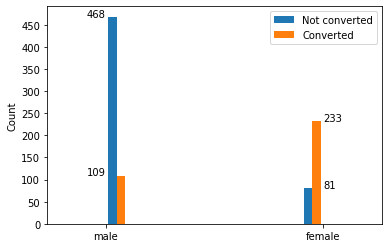

In [7]:
gender = data['gender']

plt.figure()
n, _, _ = plt.hist((gender[data['converted'] == 0], gender[data['converted'] == 1]), label = ['Not converted', 'Converted'])
plt.hlines(n[n != 0], -0.2, 1.2, alpha=0)
for i, nn in enumerate(n[n != 0]):
    if i%2:
        plt.text(1, nn, int(nn), ha='left', va='baseline')
    else:
        plt.text(0, nn, int(nn), ha='right', va='baseline')
plt.ylabel('Count')
plt.yticks(np.arange(0, np.max(n), step=50))
plt.legend(loc = 'best')
plt.show()

It is clear to see that gender is an important factor as females are disproportionally converted while males are not.

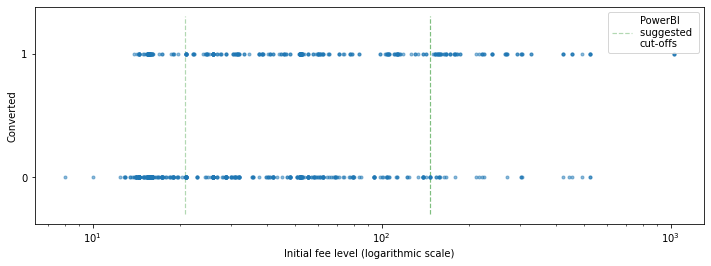

In [8]:
init_fee = data['initial_fee_level']

plt.figure(figsize=(12,4))
plt.plot(init_fee, data['converted'], '.', alpha=0.5)
plt.vlines([20.925, 147], -0.3, 1.3, linestyles='dashed', alpha=[0.3, 0.5], color='green', lw = 1.2, label='PowerBI \nsuggested \ncut-offs')
plt.xlabel('Initial fee level (logarithmic scale)')
plt.ylabel('Converted')
plt.yticks([0,1])
plt.xscale('log')
plt.legend()
plt.show()

This will be easier to see in a histogram

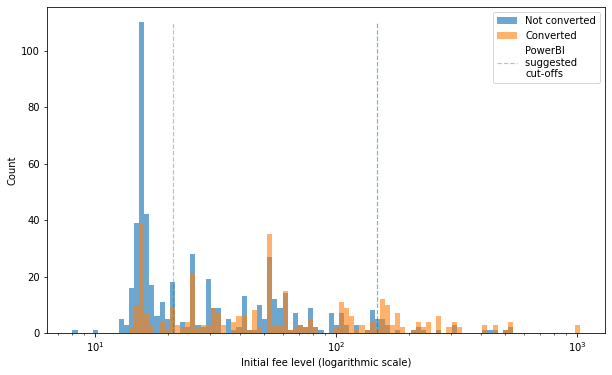

In [9]:
plt.figure(figsize=(10,6))

#The start point is the min value over 0 as it is not possible to calculate the log of 0
logbins=np.logspace(np.log10(min(init_fee[init_fee>0])),np.log10(max(init_fee)), 100)

n0, _, _ = plt.hist(init_fee[data['converted'] == 0],alpha=0.65, bins=logbins, label='Not converted')
n1, _, _ = plt.hist(init_fee[data['converted'] == 1],alpha=0.6, bins=logbins, label='Converted')
plt.vlines([20.925, 147], 0, max([*n0,*n1]), linestyles='dashed', alpha=[0.35, 0.5], color='green', lw = 1.2, label='PowerBI \nsuggested \ncut-offs')
plt.xlabel('Initial fee level (logarithmic scale)')
plt.ylabel('Count')
plt.xscale('log')
plt.legend()
plt.show()

It is very clear to see that especially the right cut-off at initial fee level > 147 contains a majority of converted customers, while a left cut-off at 20.925 has a majority of not converted customers. The middle section is a bit more muddy and in this section of the initial fee level is not a good sole factor to determine if a customer is converted or not.

Customer segment is the next on the list according to PowerBI

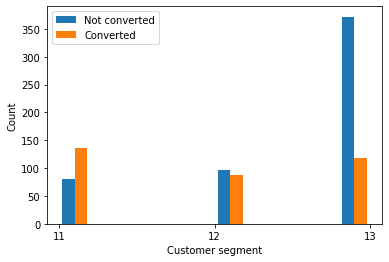

In [10]:
customer_segment = data['customer_segment']

plt.figure()
n, _, _ = plt.hist((customer_segment[data['converted'] == 0], customer_segment[data['converted'] == 1]), label = ['Not converted', 'Converted'])
plt.xticks(np.unique(customer_segment))
plt.yticks(np.arange(0, np.max(n), step=50))
plt.xlabel('Customer segment')
plt.ylabel('Count')
plt.legend(loc = 'best')
plt.show()

From this histogram it is seen that it is primarily in the customer segment 13 that this variable is good as a sole factor to determine if a customer is converted or not, as majority of customers in this segment are not converted. Segment 11 also have a little majority of customers being converted, but the difference between the number of converted and not converted customers is less

# Analysis in Python

I will use Cramer's V to determine how big correlation there is between the converted customers and the other variables. This is a test to test the relationship between two categorical variables which means that the continous variables will have to be put into categories. This will be on the cost of some precision, but this way the same test can be used for all variables. The result is a number between 0 and 1 for each variable pair, where 0 is no correlation and 1 is a strong correlation.


the customer_id column is dropped as this is a unique id for each customer and shouldnn't be 

In [11]:
data.head()

,customer_id,converted,customer_segment,gender,age,related_customers,family_size,initial_fee_level,credit_account_id,branch
0,15001,0,13,male,22.0,1,0,14.5000,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,Helsinki
1,15002,1,11,female,38.0,1,0,142.5666,afa2dc179e46e8456ffff9016f91396e9c6adf1fe20d17...,Tampere
2,15003,1,13,female,26.0,0,0,15.8500,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,Helsinki
3,15004,1,11,female,35.0,1,0,106.2000,abefcf257b5d2ff2816a68ec7c84ec8c11e0e0dc4f3425...,Helsinki
4,15005,0,13,male,35.0,0,0,16.1000,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,Helsinki


In [12]:
data_cramersV = data.copy(deep=True)

The customer credit account id is the same for all customers that don't have an id. I will refer to this id as the "generic id"

In [13]:
unique_ids = len(np.unique(data_cramersV['credit_account_id']))
print(f'Number of unique credit account ids is {unique_ids}')
gen_id = '9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6c9bc9d493a23be9de0'
no_id = len(data_cramersV[data_cramersV['credit_account_id'] == gen_id])
print(f'Number of customers with no credit account ids is {no_id}')

Number of unique credit account ids is 148
Number of customers with no credit account ids is 687


While some ids other than the generic id are present more than once in the data set I will simply divide this variable into "id"/1 and "no id"/0 categories.

In [14]:
data_cramersV.loc[data_cramersV['credit_account_id'] == gen_id, 'credit_account_id'] = 0
data_cramersV.loc[data_cramersV['credit_account_id'] != 0, 'credit_account_id'] = 1

The customer ids are unique for each customer, but as I cannot rule out that time could have an effect (if the ids are given out in cronological order), I will also group them into categories. This will only count if the ids are given out in cronological order, otherwise possible detected correlations will be accidental

In [15]:
data_cramersV['customer_id'] = pd.cut(data['customer_id'], bins = 10)

In [16]:
checked_len = len(np.unique(data_cramersV['family_size']))
print(f'Number of categories in family size is {checked_len}')

checked_len = len(np.unique(data_cramersV['age']))
print(f'Number of ages is {checked_len}')

checked_len = len(np.unique(data_cramersV['initial_fee_level']))
print(f'Number of categories in initial fee level is {checked_len}')

checked_len = len(np.unique(data_cramersV['related_customers']))
print(f'Number of related customers is {checked_len}')

Number of categories in family size is 7
Number of ages is 89
Number of categories in initial fee level is 248
Number of related customers is 7


Here it is seen that the number of categories for the family size and the related customers are both 7. As this is a low amount of categories they are kept as is.

Age and initial fee level are both divided into categories.

Age will be divided into intervals of 10 years starting at 0 years of age and the last bin decided based on the oldest person in the data set.

In [17]:
print(max(data_cramersV['age']))

80.0


In [18]:
bins = pd.IntervalIndex.from_tuples([(0, 10), (10, 20), (20, 30), (30, 40), (40, 50), (50, 60), (60, 70), (70, 80)])
data_cramersV['age'] = pd.cut(data['age'], bins = bins)

Initial fee level will be divided into logarithmic bins as there is far between the greater valued data as seen in the plots earlier

In [19]:
logbins = np.logspace(0,np.log10(max(init_fee)), 10)
data_cramersV['initial_fee_level'] = pd.cut(data['initial_fee_level'], bins = logbins)

In [20]:
len(pd.unique(data_cramersV['initial_fee_level']))

8

In [21]:
data_cramersV.head()

,customer_id,converted,customer_segment,gender,age,related_customers,family_size,initial_fee_level,credit_account_id,branch
0,"(15000.11, 15090.0]",0,13,male,"(20, 30]",1,0,"(10.082, 21.779]",0,Helsinki
1,"(15000.11, 15090.0]",1,11,female,"(30, 40]",1,0,"(101.637, 219.564]",1,Tampere
2,"(15000.11, 15090.0]",1,13,female,"(20, 30]",0,0,"(10.082, 21.779]",0,Helsinki
3,"(15000.11, 15090.0]",1,11,female,"(30, 40]",1,0,"(101.637, 219.564]",1,Helsinki
4,"(15000.11, 15090.0]",0,13,male,"(30, 40]",0,0,"(10.082, 21.779]",0,Helsinki


At last the data needs to be encoded

In [22]:
label = preprocessing.LabelEncoder()
data_cramersV_encoded = pd.DataFrame() 

for i in data_cramersV.columns :
  data_cramersV_encoded[i] = label.fit_transform(data_cramersV[i])

### Define and run CramersV

Define the Cramers V function

In [55]:
def cramers_v(confusion_matrix):
    """ calculate Cramers V statistic for categorial-categorial association.
        uses correction from Bergsma and Wicher,
        Journal of the Korean Statistical Society 42 (2013): 323-328
    """
    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

In [56]:
cramersV_results_df = pd.DataFrame(index = data_cramersV.columns, columns = data_cramersV.columns)

cramersV_results = []
for row in data_cramersV.columns:
    for col in data_cramersV.columns:
        confusion_matrix = pd.crosstab(data_cramersV[row], data_cramersV[col])
        cramers_v_val = cramers_v(confusion_matrix.values)
        cramersV_results_df[col][row] = round(cramers_v_val, 2)


In [57]:
cramersV_results_df

,customer_id,converted,customer_segment,gender,age,related_customers,family_size,initial_fee_level,credit_account_id,branch
customer_id,1.0,0.1,0.03,0.07,0.0,0.02,0.0,0.03,0.06,0.0
converted,0.1,1.0,0.34,0.54,0.11,0.19,0.16,0.34,0.31,0.17
customer_segment,0.03,0.34,1.0,0.13,0.26,0.15,0.02,0.63,0.79,0.26
gender,0.07,0.54,0.13,1.0,0.07,0.21,0.25,0.27,0.13,0.11
age,0.0,0.11,0.26,0.07,1.0,0.22,0.22,0.16,0.25,0.02
related_customers,0.02,0.19,0.15,0.21,0.22,1.0,0.24,0.25,0.14,0.09
family_size,0.0,0.16,0.02,0.25,0.22,0.24,1.0,0.19,0.09,0.05
initial_fee_level,0.03,0.34,0.63,0.27,0.16,0.25,0.19,1.0,0.64,0.21
credit_account_id,0.06,0.31,0.79,0.13,0.25,0.14,0.09,0.64,1.0,0.23
branch,0.0,0.17,0.26,0.11,0.02,0.09,0.05,0.21,0.23,1.0


In [58]:
results_arr = cramersV_results_df.values.astype('float64')

# Heatmap with the results
 
 Note that the diagonal will always be 1 as this is correlation between the variable itself.

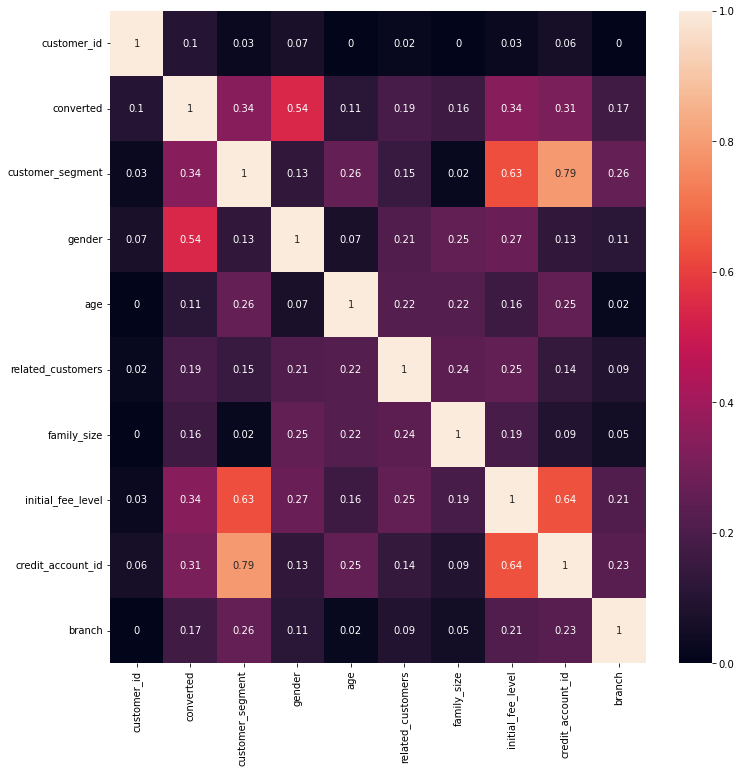

In [65]:
plt.figure(figsize=(12,12))
sns.heatmap(results_arr, annot=True, xticklabels=cramersV_results_df.columns, yticklabels=cramersV_results_df.columns)
plt.show()


##  Rundown of the different variables's correlation with "converted"   
#### Customer id
As expected is the customer id not correlated with anything.
#### Customer segment [one of the most imporant]
With a Cramer's V value of 0.34 there is some correlation between customer segment and whether a sustomer is converted or not. This is also clear to see in the histogram plotted in the beginning of this document where customer segment 13 has a majority of the customers being not converted. The rest of the segments don't have a strong relationship with "converted" which is probably what drags the Cramer's V value down.
#### Gender [one of the most imporant]
The results from Cramer's V supports the PowerBI analysis that the gender is the most important factor in determining if a customer is converted or not. The result of 0.54 in the Cramer's V is however not a very strong correlation (as the result is between 0 and 1 with 1 being the perfect correlation) and should not stand alone if one is to predict a customer's conversion status.
#### Age
Besides the customer id, age is the least important factor in relation to "converted". It is also not present in neither key influencers nor top segments in the PowerBI nalysis.
#### Related customers
The number of related customers do not have a high Cramer's V value, but do show up as one of the weaker key influencers and in some of the segments in the PowerBI analysis. Alone it is therefore not an important factor compared to other available factors, but can in combination with other factors help determine if a customer is converted.
#### Family size
Family size has a fairly low Cramer's V value of 0.16, but is included as one of the weaker key influencers in the PowerBI analysis as well as is included in some of the segments for "not converted". Alone it is thus not one of the most important factors, but can help in combination with other factors.
#### Initial fee level [one of the most imporant]
Together with customer segment this has a Cramer's V value of 0.34, which is the second to highest correlation value. It is therefore one of the three most important sole factors together with the segment and gender. 
#### Credit account id
Credit account id has a fairly high Cramer's V value (0.31) when considering that it did not show up in the PowerBI analysis. This most likely has to do with that it was separated into just two categories in this analysis based on whether the customer had an id or not. Here it thus seems that there is some correlation between whether or not a customer has an id or not, but not necessarily with the specific id itself. 
#### Branch
Like the family size, branch has one of the lower Cramer's V values of 0.17, and is likewise not one of the most important factors. Some of the specific branches are however named as key influencers by PowerBI and are included in some segments. Like with the rest it can thus with fine results be used together with other factors.

## Final notes

It is important to note that this analysis is based on looking at "converted"'s relationship with one variable at the time. Therefore stronger correlations that can be used in predictions of a customer's conversion status can be made if several factors are combined. This is supported in th PowerBI key influencer analysis where several segments consisting of 3-5 factors have a very high percentage af correct classification of "converted" based on the chosen intervals of those factor. 